# Моделирование временных рядов


## Импорт данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(16, 4)})

## Детерминированные модели


   
Простейшим случаем детерминированного временного ряда является
одномерная (одномерная) зависимость значения от времени, представленная в
следующей форме<br>
    $$ y(t) = a_0 + trend(t)+ cyclic(t) +seasonal(t) $$
где: <ul>
    <li> $y(t)$ - это временной ряд - набор выборок, проиндексированных некоторой
переменной $t$, обычно $t$ – это временные отметки, если временной шаг дискретный,
он также может быть обозначен как $n$ (номер выборки), в этом случае в реальном
времени - значение шага будет соответствовать $t = n \cdot T_s$, где $T_s$ - период шага $n$
(период дискретизации, с которым берутся отсчеты).
    <li> $a_0$ - некоторый начальный постоянный уровень,
    <li> $trend$ - это наличие некоторого тренда, который является частью зависимости с
медленным изменением.
<li> $seasonal$ - это сезонность или некоторые «относительно быстро изменяющиеся»
периодические составляющие - это относительно быстро меняющаяся часть
взаимосвязи.
<li> $cyclic$ - это некоторые периодические компоненты с "относительно медленным
изменением" с нерегулярным периодом и относительно высокой интенсивностью.
<li>  Часто в тренд включаются циклическая и 𝑎0 части, в этом случае модель может быть
задана как
    $$ y(t) = trend(t) +seasonal(t). $$  

### Исследование тренда


<font size=4  face = 'Georgia' style='Line-height : 2em'> 
    
Сначала промоделируем временной ряд как имеющий только линейный тренд, взятый с
единым периодом выборки.
    

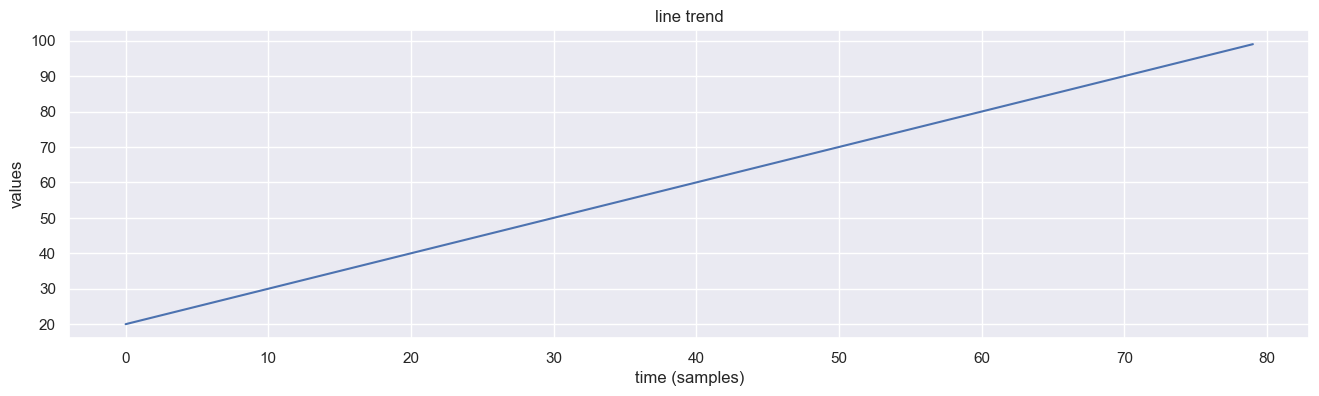

In [2]:
ts = np.arange(20,100)
fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', ylabel='values',
       title='line trend')
plt.show()


    
Есть несколько простейших типов трендов, которые могут быть представлены во
временных рядах:<ul>
<li> Линейный тренд $y(t) = a\cdot t + b$
<li> параболический тренд $y(t) = a\cdot t^2 + b \cdot x + c$
<li> полиномиальный тренд $y(t) = a\cdot t^b + c$
<li> гиперболический тренд $y(t) = \frac{a}{t^b+c} + d$
<li> экспоненциальный тренд $y(t) = \exp{(a\cdot t+b)}$
<li> насыщение (логистический) тренд  $y(t) = \frac{c}{1+exp(-k(t-m))}$    
<li> логарифмический тренд $y(t) = c\log_b{(a\cdot t)}$
<li> циклический тренд (огибающая) $y(t) = \sum_{i=0}^{N-1}sin\left(2\pi \left( n \cdot \frac{T_s}{T(n)}+\frac{n_0}{T_0}\right)\right)$  
<li> многие другие функции, которые, как правило, сглажены, очень медленно
меняются или даже монотонны.
</ul>   
Теперь мы можем попробовать логарифмический тренд с основанием $e$ ( Число Эйлера,
натуральный логарифм) и $a=4$.   
    

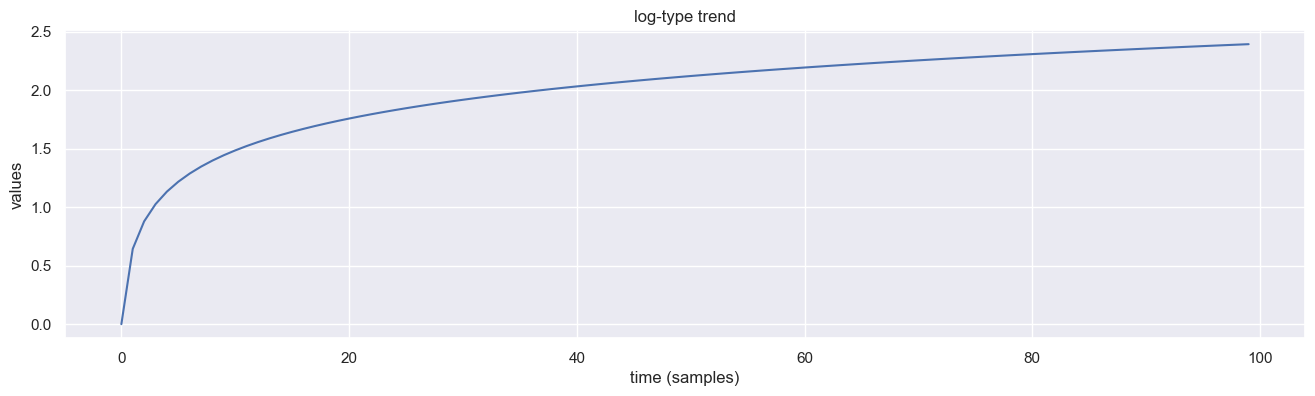

In [3]:
N_OF_SAMPLES=100 # Number of samples
a  = 4#const
c  = 0.4 
n  = np.arange(N_OF_SAMPLES)
ts = c*np.log(1+a*(n))

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', ylabel='values',
       title='log-type trend')
plt.show()


    
Для многих реальных временных рядов кусочно-монотонное поведение является
естественным, поэтому часто необходимо моделировать кусочно-монотонный тренд с
одной или несколькими точками перегиба.

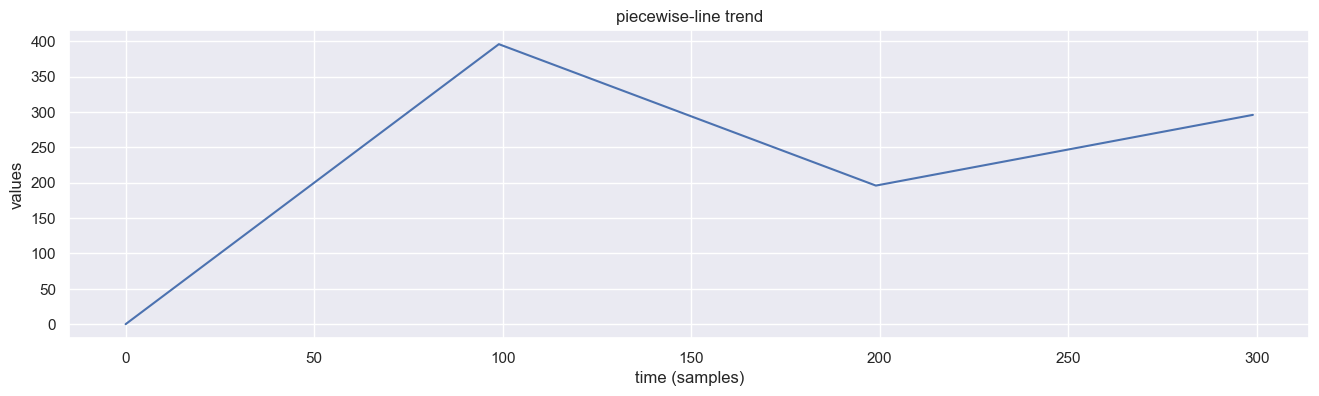

In [4]:
N_OF_SAMPLES=100 # Number of samples

a  = 4#const
n  = np.arange(N_OF_SAMPLES)
ts1 =a*n

a  = 2#const
n  = np.arange(1,N_OF_SAMPLES+1)
ts2 = ts1[-1]-a*n

a  = 1#const
n  = np.arange(1,N_OF_SAMPLES+1)
ts3 = ts2[-1]+a*n

ts = np.concatenate((ts1,ts2,ts3))

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', 
       ylabel='values',
       title='piecewise-line trend')
plt.show()

 
Давайте теперь смоделируем поведение кусочно-линейного тренда, предложенное
моделью Facebook Prophet,
$$y(t) = (k + a(t)^T \delta)t + m + a(t)^T \gamma, $$
где 
<li> $a(t)$ матрица изменения роста, описывающая точки перегиба $t_j$ (матрица с
единицами),     
<li> $k$ постоянная скорости роста, 
<li> $m$ смещение, 
<li> $\delta$ вектор изменения скорости роста, 
<li> $\gamma$  коэффициенты изменения роста $\gamma_j = t_j\delta_j$,
<li> $s_j$ точки перегиба.   

*Заметим*:
> В простейшем случае модель сводится к $y(t) = (k)t + m, $ для временного ряда без
точек перегиба $t_j$.<br>
> В модели Facebook Prophet предложили рассматривать логистическую модель как
альтернативу линейной, в этом случае тренд можно представить в виде 
    $$y(t) = \frac{c(t)}{1+exp(-(k + a(t)^T \delta)(t-m-a^T\gamma))}.$$
<!-- https://www.ritchievink.com/blog/2018/10/09/build-facebooks-prophet-in-pymc3-bayesian-time-series-analyis-with-generalized-additive-models/ -->

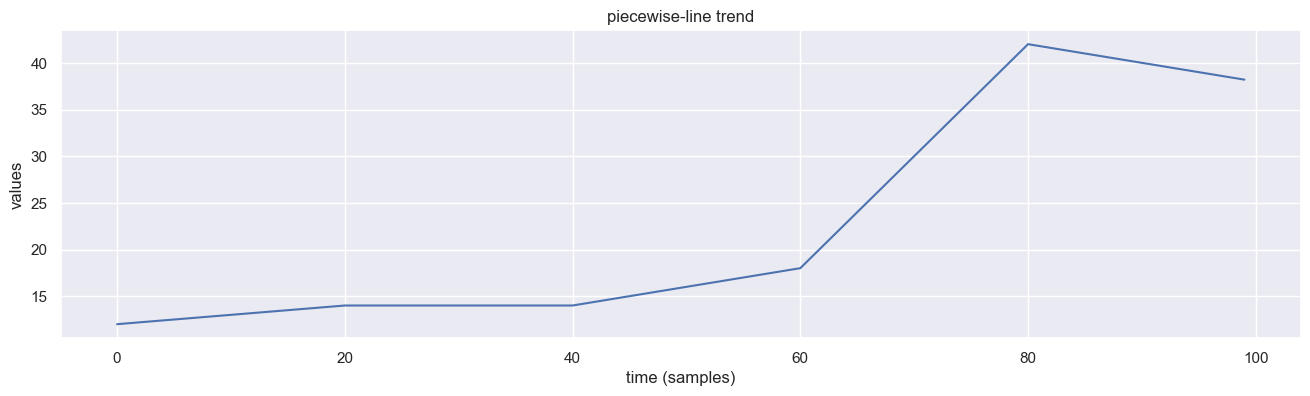

In [5]:
N_OF_SAMPLES=100 # Number of samples

k = 0.1
m = 12

n = np.arange(N_OF_SAMPLES)

inflection_points = np.array([20, 40, 60, 80])#change points

a = np.zeros(shape=(inflection_points.size, N_OF_SAMPLES)) #  the matrix of growth changing 

# fill matrix
# n[:,None] -mean add new dimention, 
#(n[:,None] > inflection_points) is the logic operation to fill matrix with false, true
#(n[:,None] > inflection_points)*1 prodece 1 for true and 0 for false
a = ((n[:,None] > inflection_points) * 1).T


delta = np.array([-0.1, 0.2, 1,  -1.4])#vector with growth rate adjustments

growth = (k + np.dot(a.T,delta)) 

gamma = -inflection_points * delta
offset = m + np.dot(a.T,gamma)

ts = growth* n + offset


fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', 
       ylabel='values',
       title='piecewise-line trend')
plt.show()

### Сезонность


Простейшую сезонную часть временного ряда можно представить в виде
$$s(t) = a\cdot sin(2\pi t/T +\theta_0) = a\cdot sin(2\pi n T_s/T +\theta_0)=a \cdot sin(2\pi f n /fs +\theta_0),$$    

где: <ul>
    <li>$a$ — интенсивность сезонной составляющей;
    <li>$T$ — сезонный период (месяц, день, неделя и т. д.);
    <li>$\theta_0$ — начальный сдвиг (начальная фаза) сезонности;
    <li>$T_s$ — период выборки;
    <li>$f$ и $f_s$ — сезонная частота ($f=1/T$) и частота дискретизации $f_s = 1/T_s$. <br>
Давайте смоделируем эту серию.<br>
</ul>

<i>Примечание</i><ul>
    <li>В соответствии с теоремой Шеннона-Найквиста-Котельникова минимальное значение $f_s$ должно быть $$f_s\ge2f \to T \ge 2T_s.$$
    <li>Для оценки полученного количества периодов используйте $$N_{periods} = N\cdot T_s/T $$   

number of periods =  3.0


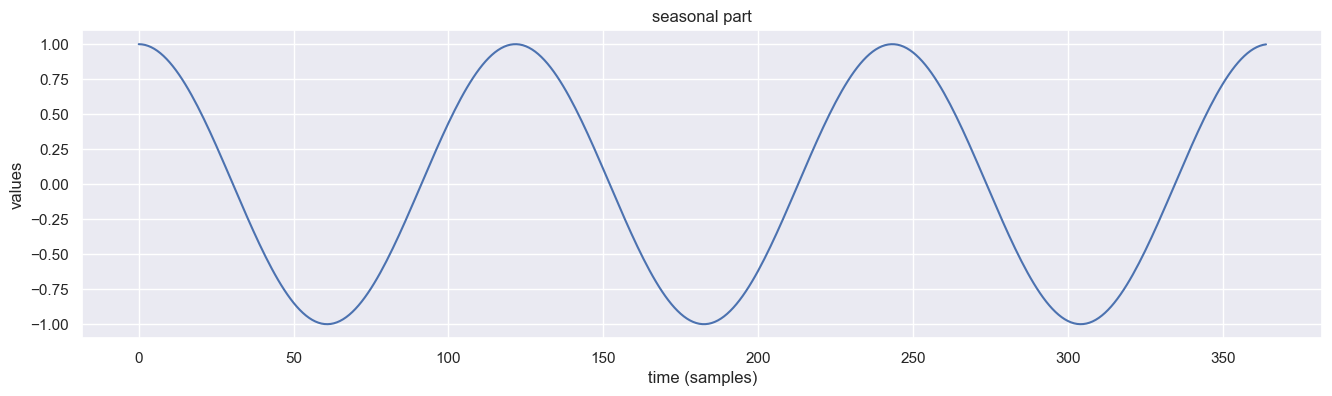

In [6]:
N_OF_SAMPLES=365 # Number of samples

n  = np.arange(N_OF_SAMPLES)

a = 1


Ts = 1/365

T =1/3

theta = np.pi/2

print('number of periods = ',N_OF_SAMPLES*Ts/T)

ts = a*np.sin(2*np.pi*n*Ts/T+theta)

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='time (samples)', 
       ylabel='values',
       title='seasonal part')
plt.show()


Давайте теперь смоделируем более сложную сезонность в году, например месяц и неделю. Мы начнем с аддитивной модели:
 $$seasonality=\sum_{i=0}^{M}a_i\cdot sin(2\pi n T_s/T_i +\theta_i)$$
Отметим, что тут в отличии от циклического тренда период сезонности достаточно быстрый и в общем случае ожидается постоянным.

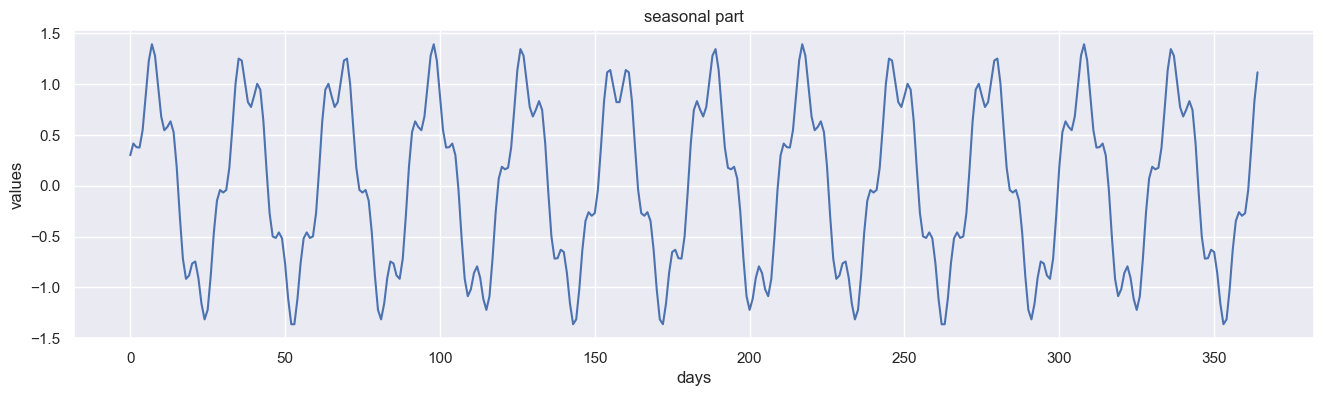

In [7]:
N_OF_DAYS=365# Number of samples

days  = np.arange(N_OF_DAYS)

a_w = 0.3 #weak influence

a_m = 1.1 #month influence

T_w = 7/365

T_m = 30/365

Ts = 1/365

theta_w = np.pi/2

theta_m = 0

ts = a_w*np.sin(2*np.pi*days*Ts/T_w + theta_w)+a_m*np.sin(2*np.pi*days*Ts/T_m + theta_m) 

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='seasonal part')
plt.show()


Теперь мы можем моделировать аддитивные и мультипликативные временные ряды: 
    $$y(t) = seasonality(t)+trend(t)$$
В нашем случае это будет реализовано как:
 $$y(t)  =  bias_{trend} + a_{trend}nT_s + a_m\cdot sin(2\pi n T_s/T_m )+ a_w\cdot sin(2\pi n T_s/T_w ) $$

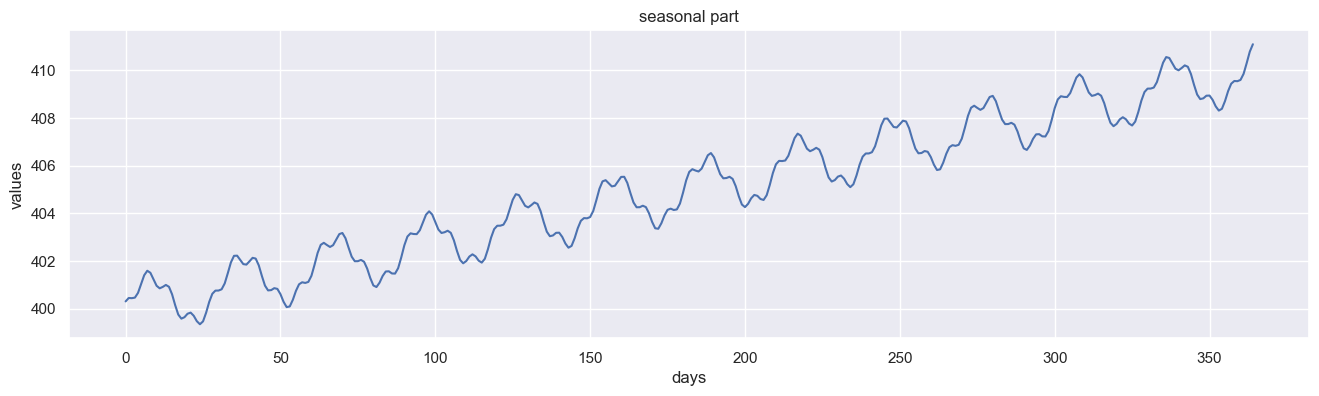

In [8]:
YEAR = 365

WEEK = 7

MONTH = 30

N_OF_DAYS=YEAR# Number of samples

days  = np.arange(N_OF_DAYS)

a_w = 0.3 #weak influence

a_m = 1.1 #month influence

T_w = WEEK/YEAR

T_m = MONTH/YEAR

Ts = 1/YEAR

theta_w = np.pi/2

theta_m = 0

a_trend = 10 #slope

bias_trend = 400

trend = a_trend*days*Ts+bias_trend 

seasonality = a_w*np.sin(2*np.pi*days*Ts/T_w + theta_w)+a_m*np.sin(2*np.pi*days*Ts/T_m + theta_m) 

ts =trend + seasonality

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='seasonal part')
plt.show()

### Цикличность тренда



 Помимо тренда и сезонности мы можем добавить некоторую цикличность (как альтернативу можно рассматривать как дополнение трендового поведения).
    
Давайте смоделируем это как некоторую зависимость год-сезон. Например, в приведенном ниже примере мы моделируем падение продаж в середине года (летом).

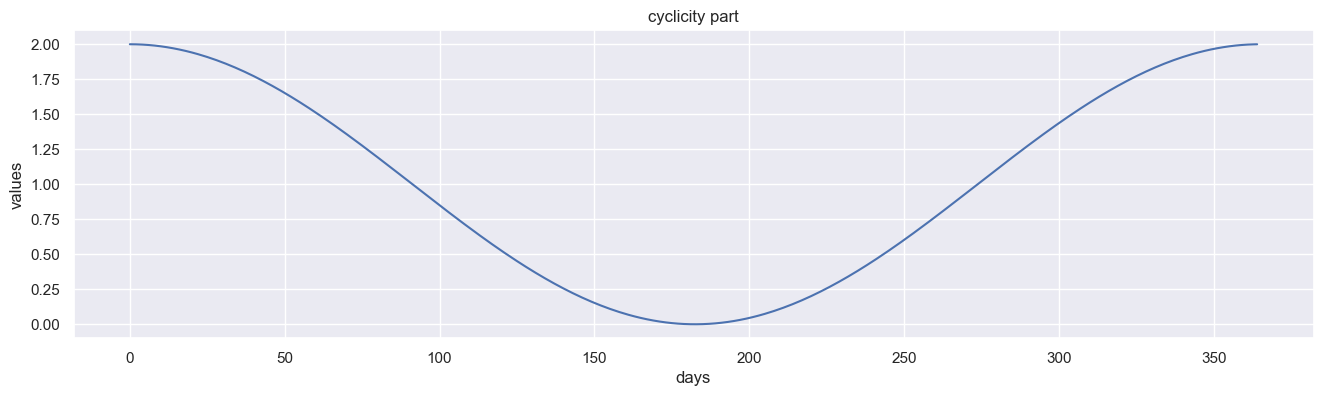

In [9]:
a_cycl = 1
T_cycl = 1
cyclicity = a_cycl +a_cycl *np.sin(2*np.pi*days*Ts/T_cycl + np.pi/2)

ts =cyclicity

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='cyclicity part')
plt.show()


Теперь мы можем добавить цикличность к линейному тренду


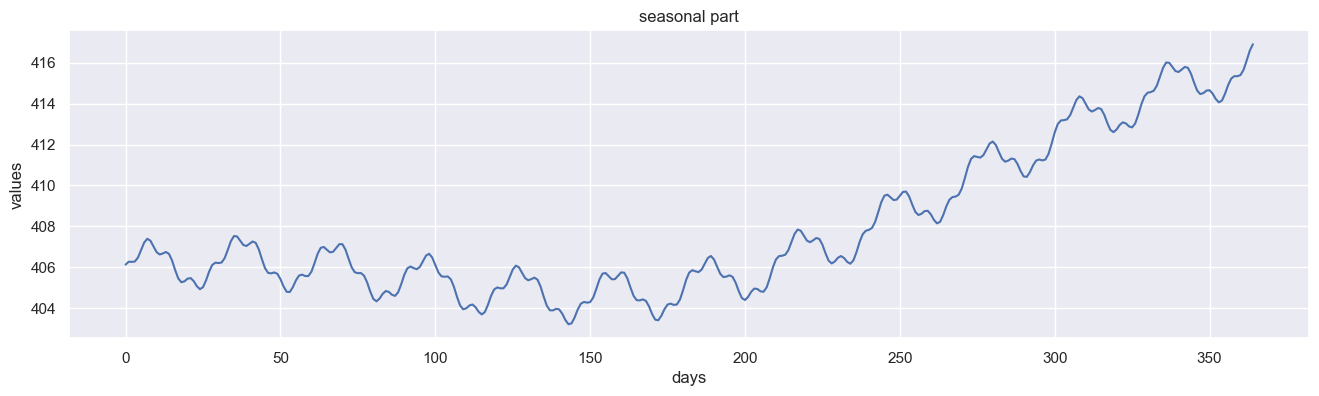

In [10]:
YEAR = 365

WEEK = 7

MONTH = 30

N_OF_DAYS=YEAR# Number of samples

days  = np.arange(N_OF_DAYS)

a_w = 0.3 #weak influence

a_m = 1.1 #month influence

T_w = WEEK/YEAR

T_m = MONTH/YEAR

Ts = 1/YEAR

theta_w = np.pi/2

theta_m = 0

a_trend = 10 #slope

bias_trend = 400

trend = a_trend*days*Ts+bias_trend 

seasonality = a_w*np.sin(2*np.pi*days*Ts/T_w + theta_w)+a_m*np.sin(2*np.pi*days*Ts/T_m + theta_m) 

a_cycl = 2.91
T_cycl = 1
cyclicity = a_cycl+a_cycl *np.sin(2*np.pi*days*Ts/T_cycl + np.pi/2)

ts =trend + seasonality + cyclicity

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='seasonal part')
plt.show()

### Особые события

Помимо тренда и регулярной сезонности, в модель временных рядов могут быть введены "особые события". 

Например, если мы моделируем временные ряды продаж, будет интересно добавить некоторые изменения спроса в рабочие дни. 

В простейшем случае это можно сделать следующим образом:
     $$\text{week_days}(день) = \sum_{i=1}^7a_i\delta(\lfloor{(day-1)/7}\rfloor+1-i),$$
где <ul>
<li> $\lfloor{день/7}\rfloor$ - означает остаток деления;
<!-- <ul> для тестовой попытки: <code class="language-python">
         печать (np.arange (1,8))
(7*50+np.arange(1,8)-1)%7+1 </code></ul> -->
<li> $\delta$ — дельта-функция Кронекера, 
 $$\delta (i,j)= \delta (i-j)= 
 \begin{cases}   
   1 &\text{if}i=j\\
   0 &\text{otherwise}
 \end{cases}$$
<li> i — номер дня ($i = 1,2,3,4,5,6,7$).
  </ul>
 
*Примечание* Если вы хотите считать дни не с понедельника, используйте
$$\text{week_days}(day) = \sum_{i=1}^7a_i\delta(\lfloor{(day-1 + shift-1 )/7}\rfloor+1-i),$$
где $shift$ – количество дней, на которые нужно сдвинуться.<br>
Давайте проверим этот результат

In [11]:
N_OF_DAYS =14
shift = 1
days = np.arange(1,N_OF_DAYS+1)
print((days-1+(shift-1))%7+1)


[1 2 3 4 5 6 7 1 2 3 4 5 6 7]



Для моделирования поведения  дней недели мы будем использовать $a_{week}$ набор из 7 коэффициентов

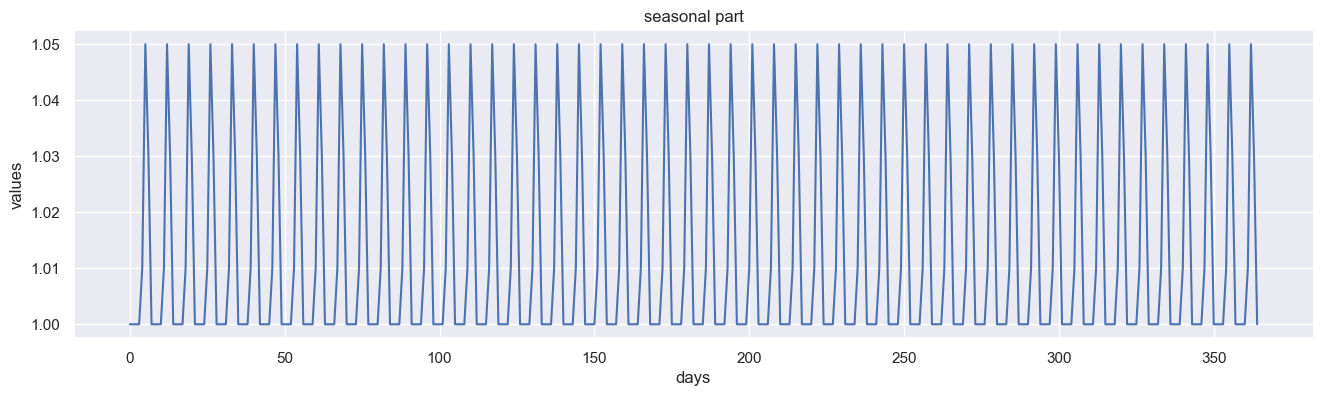

In [12]:
N_OF_DAYS=365

days  = np.arange(N_OF_SAMPLES)

# week days coefficients
a_week = np.array([1, 1, 1, 1, 1.01, 1.05, 1.03])

#for the number of days multiples of the week
week_days = list(a_week)*int(N_OF_DAYS/7) 

# add rest of the days
week_days = np.array([*week_days,*a_week[:N_OF_DAYS%7]])

#check that week_days size equal to N_OF_DAYS
assert week_days.size==N_OF_DAYS

ts = week_days

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='seasonal part')
plt.show()


Для имитации влияния дней недели на линейный тренд можно ввести следующую модель
$$
y(day)  = bias_{trend} + a_{trend}day + a_{trend}\text{wee_days_coefficients}  = \\
y(day) = trend + \text{week_days},$$
где $\text{week_days}$ модель дней недели с трендом

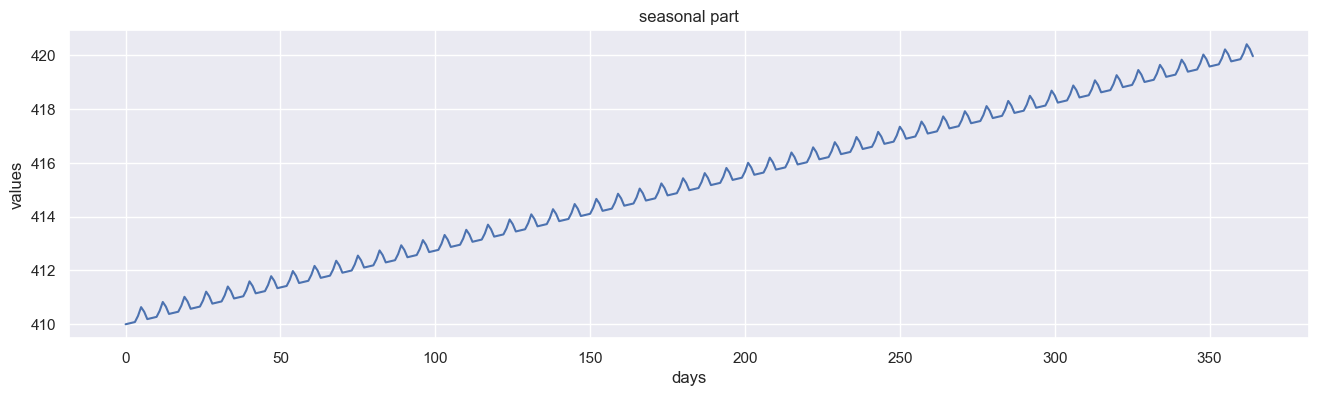

In [13]:
N_OF_DAYS = 365
days      = np.arange(N_OF_SAMPLES)

a_trend    = 10 #slope
bias_trend = 400
week_coefficients = np.array([1, 1, 1, 1, 1.02, 1.05, 1.03])

a_week = week_coefficients*a_trend

week_days = np.array([*list(a_week)*int(N_OF_DAYS/7), *a_week[:N_OF_DAYS%7]])

trend = a_trend*n*Ts+bias_trend 

ts =week_days + trend 

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='seasonal part')
plt.show()

Давайте теперь добавим часть сезонности и создадим модель на два года с логистическим трендом.

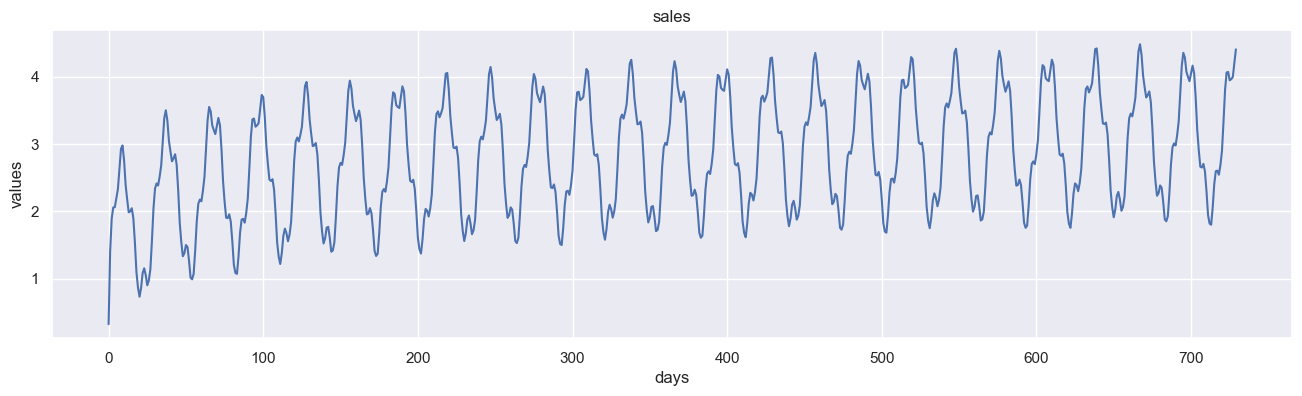

In [14]:
YEAR = 365

WEEK = 7

MONTH = 30

N_OF_DAYS=YEAR*2# Number of samples

days  = np.arange(N_OF_DAYS)

a_w = 0.3 #weak influence

a_m = 1.1 #month influence

T_w = WEEK/YEAR

T_m = MONTH/YEAR

Ts = 1/YEAR

a_trend = 5 
c_trend = 0.34 

week_coefficients = np.array([0.95, 1, 1, 1, 1, 1.25, 1.03])

a_week = week_coefficients*c_trend

trend = c_trend*np.log(1+a_trend*days)

seasonality = a_w*np.sin(2*np.pi*days*Ts/T_w )+a_m*np.sin(2*np.pi*days*Ts/T_m ) 


week_days = np.array([*list(a_week)*int(N_OF_DAYS/7), *a_week[:N_OF_DAYS%7]])


ts    = week_days + trend  + seasonality 

fig, ax = plt.subplots()
ax.plot(ts)
ax.set(xlabel='days', 
       ylabel='values',
       title='sales')
plt.show()

## Моделирование шумов

### Белый Гауссов Шум

Помимо детерминированной части временного ряда, важно смоделировать его стохастическое поведение.<br>
Стохастическое поведение временного ряда в первую очередь связано с влиянием шума.<br>
Наиболее простой и наиболее распространенной моделью шума является<br>
<b>Белый Гауссов шум (White Gaussian Noise, WGN)</b> (идентичен понятию <b>независимой и одинаково распределенной величины (independent and identically distributed, i.i.d) </b> модели шума).<br>
WGN имеет нормальное распределение с нулевым средним значением и дисперсией $\sigma^2 < \infty$. Шум обычно обозначается как
$$noise(t) \sim N(0,\sigma)$$
а его распределение задается функцией плотности вероятности:
$$ P(t) = N(0,\sigma)  = \frac{1}{\sigma\sqrt{2\pi}}exp{(\frac{-t^2}{2\sigma^2})}$$

где $\sigma^2$ мощность шума - стандартное отклонение шумов (квадратный корень из дисперсии).<br>
Давайте смоделируем белый гауссовский шум.

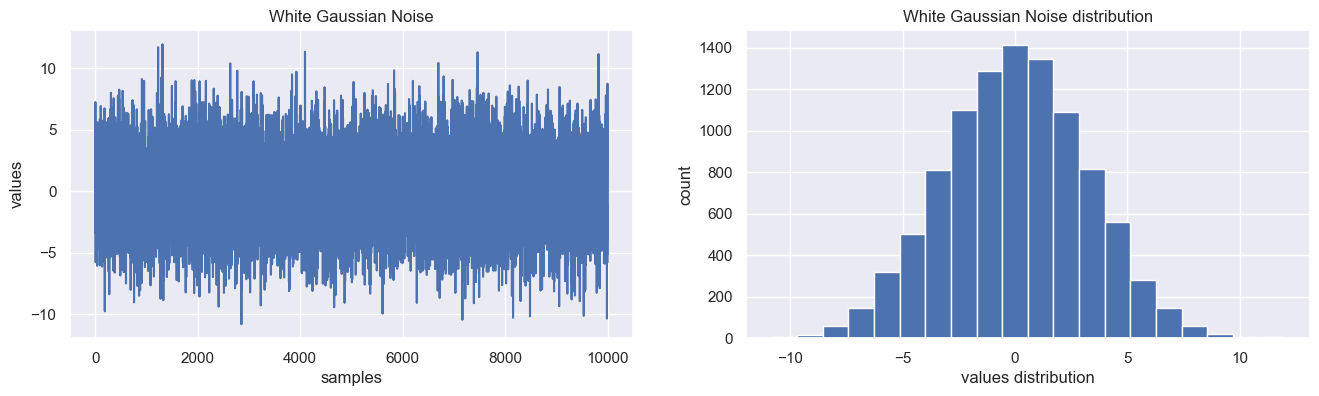

In [15]:
N_OF_SAMPLES = 10000

noise_power  = 10 

wgn = np.sqrt(noise_power)*np.random.normal(size = N_OF_SAMPLES)

ts = wgn 

fig, ax = plt.subplots(1,2)

ax[0].plot(ts)
ax[0].set(xlabel='samples', 
       ylabel='values',
       title='White Gaussian Noise')

ax[1].hist(ts, bins = 20)
ax[1].set(xlabel='values distribution', 
       ylabel='count',
       title='White Gaussian Noise distribution')
plt.show()

Таким образом, мы можем видеть, как шум влияет на временной ряд.

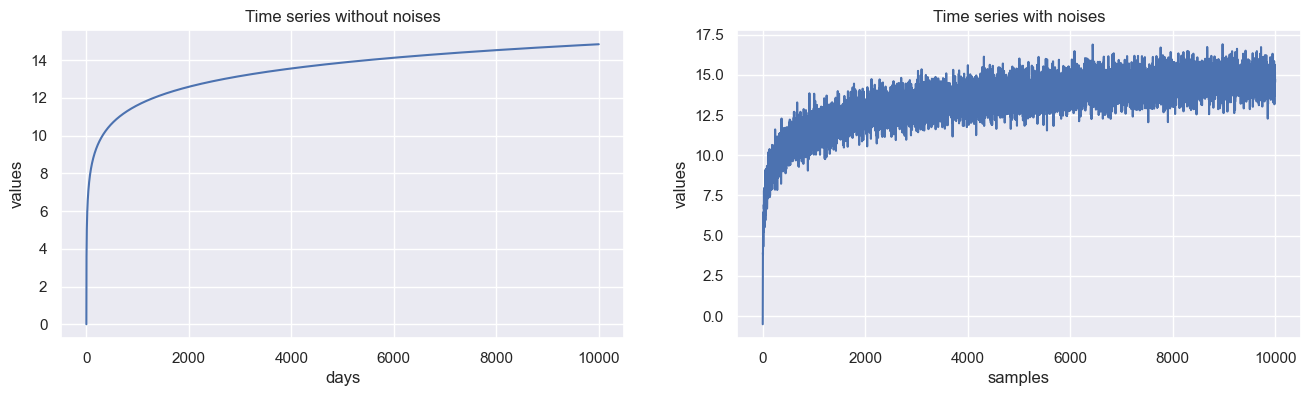

In [16]:
N_OF_SAMPLES = 10000

noise_power  = 0.5 

wgn = (np.sqrt(noise_power))*(np.random.normal(size = N_OF_SAMPLES))

a  = 4#const
c  = 1.4 
n  = np.arange(N_OF_SAMPLES)
ts = c*np.log(1+a*(n))

ts_wn = ts + wgn

fig, ax = plt.subplots(1,2)

ax[0].plot(ts)
ax[0].set(xlabel='days', 
       ylabel='values',
       title='Time series without noises')

ax[1].plot(ts_wn)
ax[1].set(xlabel='samples', 
       ylabel='values',
       title='Time series with noises')
plt.show()

Помимо одинаково распределенного шума, соответствующего стационарной модели шума,<br>
важно моделировать нестационарные случаи.<br>
Самый простой случай — линейно возрастающая вариация,  

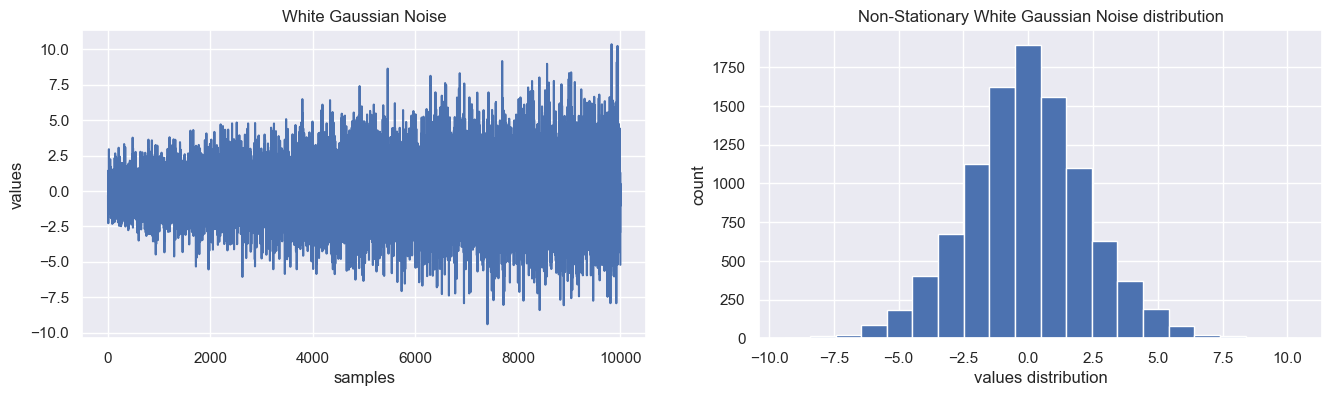

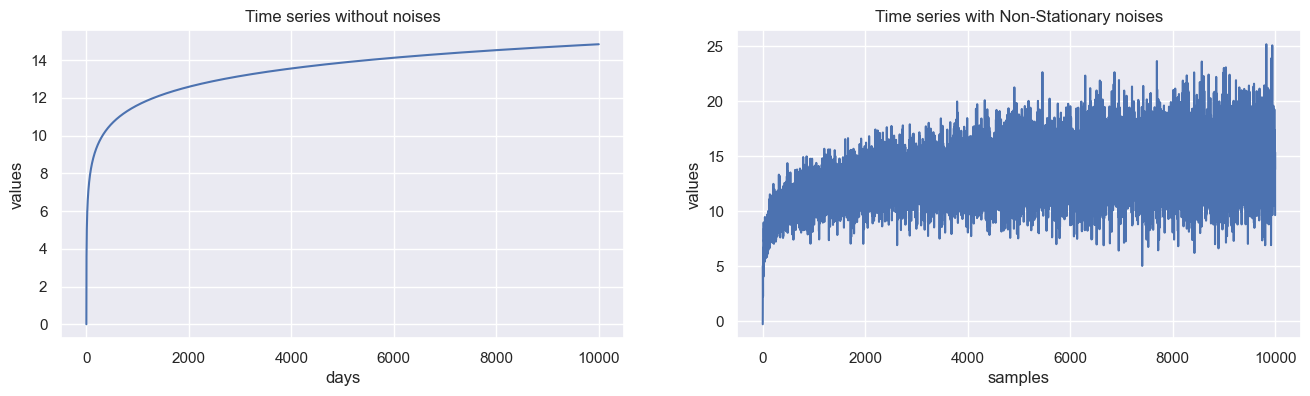

In [17]:
N_OF_SAMPLES = 10000
a  = 4#const
c  = 1.4 

noise_power  = np.linspace(1,10,N_OF_SAMPLES) #linearly growing noise power 

wgn = np.sqrt(noise_power)*np.random.normal(size = N_OF_SAMPLES)

ts = c*np.log(1+a*np.arange(N_OF_SAMPLES))

ts_wn = ts + wgn

fig, ax = plt.subplots(1,2)

ax[0].plot(wgn)
ax[0].set(xlabel='samples', 
       ylabel='values',
       title='White Gaussian Noise')

ax[1].hist(wgn, bins = 20)
ax[1].set(xlabel='values distribution', 
       ylabel='count',
       title='Non-Stationary White Gaussian Noise distribution')
fig, ax = plt.subplots(1,2)
ax[0].plot(ts)
ax[0].set(xlabel='days', 
       ylabel='values',
       title='Time series without noises')

ax[1].plot(ts_wn)
ax[1].set(xlabel='samples', 
       ylabel='values',
       title='Time series with Non-Stationary noises')
plt.show()

### Случайное блуждание

Помимо аддитивного шума, важной моделью шума является случайное блуждание, которое в простейшем случае можно смоделировать как
    $$y(t) = y(t-1)+\eta(t),$$
где $\eta(t)\sim N(0,\sigma^2)$<br>
Модель широко распространена при исследовании ряда бизнес-процессов.

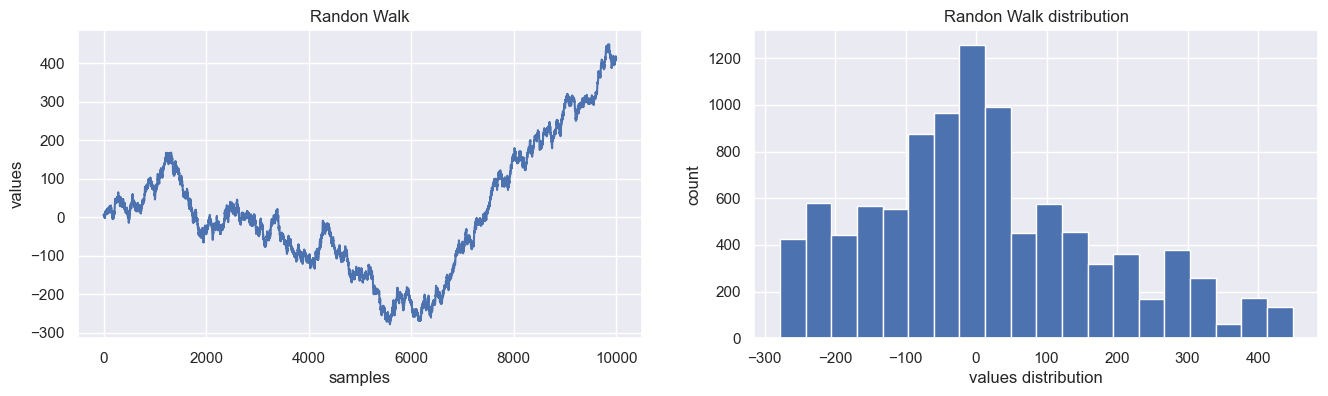

In [18]:
N_OF_SAMPLES = 10000

noise_power  = 10

wgn = np.sqrt(noise_power)*np.random.normal(size = N_OF_SAMPLES)

ts = np.cumsum(wgn )

fig, ax = plt.subplots(1,2)

ax[0].plot(ts)
ax[0].set(xlabel='samples', 
       ylabel='values',
       title='Randon Walk')

ax[1].hist(ts, bins = 20)
ax[1].set(xlabel='values distribution', 
       ylabel='count',
       title='Randon Walk distribution')
plt.show()

### Упражнения 1

1. Реализуйте модель логистического тренда Facebook Prophet

    $y(t) = \frac{c(t)}{1+\exp(-(k + a(t)^T \delta)(t-m-a^T\gamma))}$
2. Для модели тренда добавьте аддитивную квартальную сезонность.
3. Для модели тренда добавьте мультипликативную ежемесячную сезонность.
4. Реализуйте мультипликативную детерминированную модель временных рядов с
сезонной, циклической и трендовой частями.
5. К модели добавьте падение спроса в праздничные дни в начале года.

### Упражнения 2

1. Исследовать влияние аддитивного стационарного и нестационарного белого шума на временные ряды с сезонными частями и частями тренда в следующей форме $$ y(t) = a_0 + trend(t) +seasonal(t) + cyclic(t) + \text{rare_events(t)}+ noise(t). $$
2. Смоделировать модель временного ряда в следующем виде
$$y(t) = a_0 + (trend(t) \cdot cyclic(t) + seasonal_1(t))\cdot seasonal_2(t) + noise(t).$$

3. Исследуйте 3 модели случайного блуждания:  
    * Модель с дрейфом $$y(t) =\alpha + y(t-1) + \eta(t) $$   
    * Модель с трендом $$y(t) =\alpha + \beta\cdot t + y(t-1) + \eta(t) $$  
    * Модель с изменением интенсивности $$y(t) = y(t-1) + \eta(t) , \\ \eta(t)\sim N(0, \sigma^2(t)),\\ \sigma^2(t) = \sigma_0 + \gamma\cdot t $$